In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


Data Cleaning

In [2]:
# Display file that is in the folder
import os
os.listdir()


['.config', 'IT Salary Survey EU  2020.csv', 'sample_data']

In [3]:

df = pd.read_csv('IT Salary Survey EU  2020.csv')
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000,70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,60000.0,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,0,90000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,40950,33800.0,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


In [4]:
# Renaming the columns

df = df.rename(columns={"Your main technology / programming language": "main_tech", "Position ": "Position", "Total years of experience" : "years of experience", "Yearly brutto salary (without bonus and stocks) in EUR" : "Salary"})
df

,Timestamp,Age,Gender,City,Position,years of experience,Years of experience in Germany,Seniority level,main_tech,Other technologies/programming languages you use often,Salary,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000,70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,60000.0,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,0,90000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,40950,33800.0,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


In [5]:
# Droping some columns

selected_columns = ["Age", "Gender", "City", "Position", "years of experience",
                    "main_tech", "Seniority level", "Salary"]

df = df.loc[:, selected_columns]

df.shape


(1253, 8)

In [6]:
# Random order data
df.sample(5)

,Age,Gender,City,Position,years of experience,main_tech,Seniority level,Salary
620,40.0,Male,Karlsruhe,Team Manager,20,C#,Lead,85000.0
763,30.0,Male,Berlin,Backend Developer,9,Java,Head,85000.0
1085,37.0,NaN,Munich,Software Engineer,15,C,Senior,120000.0
137,42.0,Male,Berlin,Software Engineer,20,Ruby on Rails,Senior,80000.0
506,43.0,Male,Munich,Consultant,21,Java,Senior,72000.0


In [7]:
# Drop NaN values
df.dropna(inplace=True)
df.shape

(1091, 8)

In [8]:

df['Gender'].value_counts()


Male       933
Female     156
Diverse      2
Name: Gender, dtype: int64

In [9]:
# Display unique items count in each categorical columns (how many cities, how many positions etc)

for col in df.select_dtypes('object').columns:
    print(col, df[col
    ].nunique())

Gender 3
City 114
Position 124
years of experience 45
main_tech 253
Seniority level 22


In [10]:
# Describe numerical features 
df.describe()


,Age,Salary
count,1091.000000,1.091000e+03
mean,32.345555,5.297243e+05
std,5.562714,1.513550e+07
min,20.000000,1.000100e+04
25%,28.000000,5.800000e+04
50%,32.000000,7.000000e+04
75%,35.000000,8.000000e+04
max,66.000000,5.000000e+08


In [11]:
# Looking inside data, finding unique details (122 people have 5 years of experience, 122 people have 10 years of experience etc)
df["years of experience"].value_counts()

# Converting categorical years of experience into numerical years of experience
df["years of experience"] = pd.to_numeric(df["years of experience"], errors="coerce")

# Filling Nan value creating by strings such as data scientist
df["years of experience"].fillna(df["years of experience"].mean(), inplace=True)

df["years of experience"].value_counts()


5.000000     122
10.000000    122
6.000000      89
8.000000      82
7.000000      73
4.000000      71
12.000000     59
3.000000      58
15.000000     57
9.000000      54
2.000000      52
11.000000     36
14.000000     35
13.000000     30
1.000000      29
20.000000     25
16.000000     18
18.000000     12
17.000000     10
8.691052       7
0.000000       6
19.000000      6
25.000000      6
22.000000      5
2.500000       4
30.000000      4
3.500000       2
0.800000       2
1.500000       2
21.000000      2
4.500000       2
24.000000      1
31.000000      1
27.000000      1
5.500000       1
23.000000      1
28.000000      1
40.000000      1
26.000000      1
29.000000      1
Name: years of experience, dtype: int64

In [12]:
# How many people work in each city
df['City'].value_counts().iloc[:20]

Berlin        586
Munich        209
Frankfurt      37
Hamburg        36
Stuttgart      22
Cologne        17
Amsterdam       9
Stockholm       5
Moscow          5
Düsseldorf      5
Prague          5
Stuttgart       5
London          4
Karlsruhe       4
Helsinki        4
Heidelberg      4
Zurich          4
Darmstadt       3
Rome            3
Dusseldorf      3
Name: City, dtype: int64

In [13]:
#Selecting only 7 main cities
df = df[df['City'].isin(df['City'].value_counts().index[:7])]


In [14]:
#making sure it has been selected only 7 cities
df['City'].value_counts()

Berlin       586
Munich       209
Frankfurt     37
Hamburg       36
Stuttgart     22
Cologne       17
Amsterdam      9
Name: City, dtype: int64

In [15]:
#How many people work in each position
df['Position'].value_counts()

Software Engineer        313
Backend Developer        145
Frontend Developer        76
Data Scientist            73
QA Engineer               48
                        ... 
Support Engineer           1
DBA                        1
Business Analyst           1
Security Engineer          1
IT Operations Manager      1
Name: Position, Length: 102, dtype: int64

In [16]:
# Desplaying only top 12 postitions
df['Position'].value_counts().iloc[:12]

Software Engineer      313
Backend Developer      145
Frontend Developer      76
Data Scientist          73
QA Engineer             48
Mobile Developer        43
DevOps                  35
ML Engineer             31
Data Engineer           21
Engineering Manager      9
Product Manager          7
Designer (UI/UX)         6
Name: Position, dtype: int64

In [17]:
# Selecting 12 top positions for modeling (deleting the rest)
df = df[df['Position'].isin(df['Position'].value_counts().index[:12])]

In [18]:
#Displaying top 20 main technologies
df['main_tech'].value_counts().iloc[:20]

Java          151
Python        103
PHP            40
JavaScript     27
Javascript     27
Scala          24
C++            22
Go             20
Kotlin         20
Swift          19
python         17
Python         17
Ruby           17
C#             16
TypeScript     12
iOS             9
.NET            8
JS              8
php             7
Android         6
Name: main_tech, dtype: int64

In [19]:
# Data cleaning - on JavaScript mispelling
df['main_tech'] = df['main_tech'].replace({"Javascript":"JavaScript", "python":"Python"})

In [20]:
# Veryfing data cleaning and displaying top 14 main technologies
df['main_tech'].value_counts().iloc[:14]

Java          151
Python        120
JavaScript     54
PHP            40
Scala          24
C++            22
Kotlin         20
Go             20
Swift          19
Python         17
Ruby           17
C#             16
TypeScript     12
iOS             9
Name: main_tech, dtype: int64

In [21]:
#Selecting top 14 main technologies for modeling (deleting the rest)
df = df[df['main_tech'].isin(df['main_tech'].value_counts().index[:14])]

In [22]:
# Counting how many people work in each Seniority level
df["Seniority level"].value_counts()

Senior             275
Middle             152
Lead                73
Junior              28
Head                10
Principal            1
intern               1
Working Student      1
Name: Seniority level, dtype: int64

In [23]:
#Selecting only top 5 level for modeling (deleting the rest)
df = df[df['Seniority level'].isin(df['Seniority level'].value_counts().index[:5])]

In [24]:
# Cheking the value (make sure it has only 5 Seniority levels)
df["Seniority level"].value_counts()

Senior    275
Middle    152
Lead       73
Junior     28
Head       10
Name: Seniority level, dtype: int64

In [25]:
df

,Age,Gender,City,Position,years of experience,main_tech,Seniority level,Salary
0,26.0,Male,Munich,Software Engineer,5.0,TypeScript,Senior,80000.0
1,26.0,Male,Berlin,Backend Developer,7.0,Ruby,Senior,80000.0
3,28.0,Male,Berlin,Frontend Developer,4.0,JavaScript,Junior,54000.0
6,37.0,Male,Berlin,Frontend Developer,6.0,JavaScript,Middle,57000.0
8,29.0,Male,Berlin,Backend Developer,8.0,PHP,Senior,56000.0
...,...,...,...,...,...,...,...,...
1236,39.0,Male,Berlin,QA Engineer,7.0,Java,Senior,76000.0
1243,32.0,Female,Munich,QA Engineer,8.0,Java,Senior,55000.0
1244,32.0,Male,Munich,Software Engineer,10.0,Scala,Head,95000.0
1245,28.0,Male,Berlin,Frontend Developer,5.0,JavaScript,Middle,55000.0


**Data Visualisation**

Text(10.049999999999997, 0.5, 'Number of people')

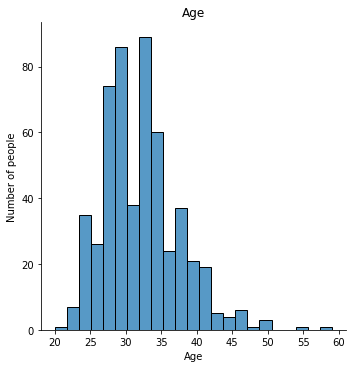

In [26]:
# Age
sns.displot(df["Age"])
plt.title("Age")
plt.ylabel("Number of people")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Age vs Seniority level')

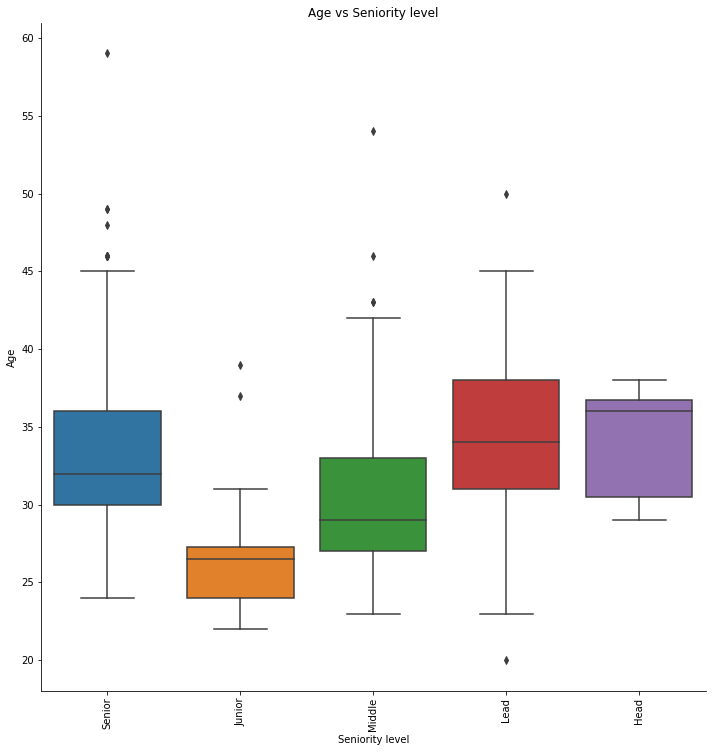

In [27]:
# Age vs Seniority level (box)

sns.catplot(x="Seniority level", y="Age",kind="box", data=df,size=10)
plt.xticks(rotation=90)
plt.title("Age vs Seniority level")

In [28]:
df['Gender'].value_counts()

Male       471
Female      66
Diverse      1
Name: Gender, dtype: int64

In [29]:
Gender = df['Gender'].value_counts(normalize=True)*100
Gender

Male       87.546468
Female     12.267658
Diverse     0.185874
Name: Gender, dtype: float64

Text(0.5, 1.0, 'Gender Pie Chart')

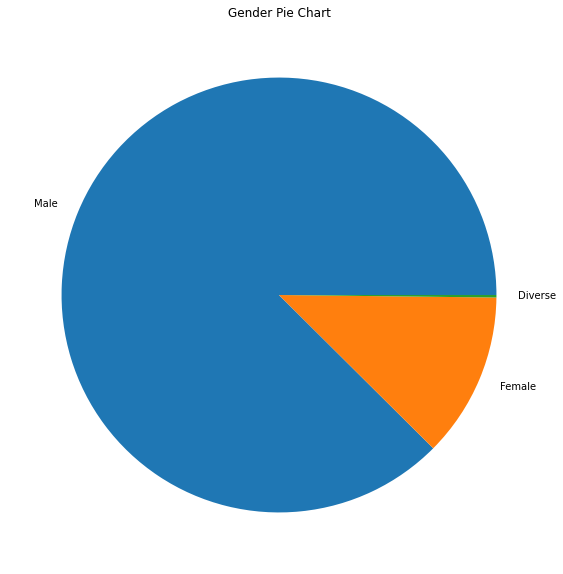

In [30]:
plt.figure(figsize=(10,10))
plt.pie(Gender, labels=Gender.index)
plt.title("Gender Pie Chart")

In [31]:
df.columns

Index(['Age', 'Gender', 'City', 'Position', 'years of experience', 'main_tech',
       'Seniority level', 'Salary'],
      dtype='object')

Text(0.5, 1.0, 'Gender vs Salary Average')

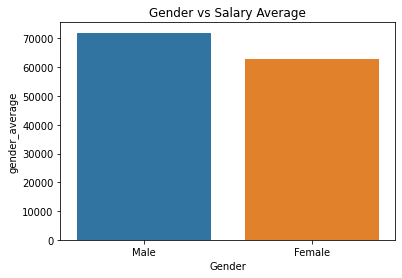

In [32]:
# Gender vs Salary Average

df_gen = df[df["Gender"].isin(["Male", "Female"])]
op = df_gen.groupby("Gender").agg(gender_average = ('Salary', 'median'))
op = op.reset_index()
op = op.sort_values("gender_average", ascending=False)
sns.barplot(x=op["Gender"], y=op["gender_average"])
plt.title("Gender vs Salary Average")


Text(0, 0.5, 'Number of people')

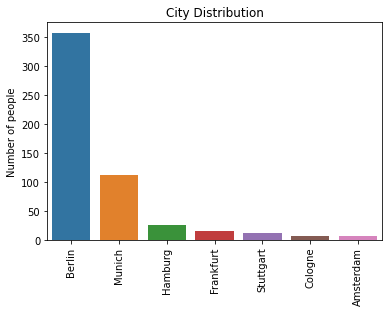

In [33]:
# Cities (bar chart)
city = df['City'].value_counts()
sns.barplot(x=city.index, y=city.values)
plt.title("City Distribution")
plt.xticks(rotation=90)
plt.ylabel("Number of people")

Text(0, 0.5, 'Number of people')

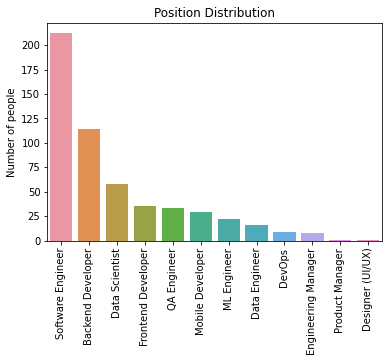

In [34]:
# Position (bar chart)

pos = df['Position'].value_counts()
sns.barplot(x=pos.index, y=pos.values)
plt.title("Position Distribution")
plt.xticks(rotation=90)
plt.ylabel("Number of people")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

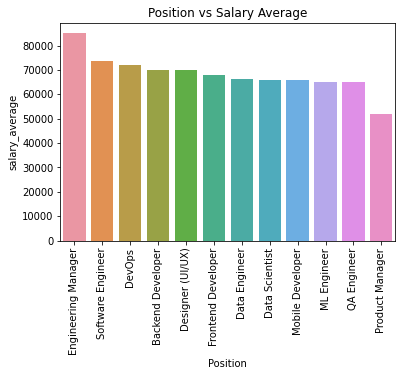

In [35]:
#Avarege salary for each position
op = df.groupby("Position").agg(salary_average = ('Salary', 'median'))
op = op.reset_index()
op = op.sort_values('salary_average', ascending=False)
sns.barplot(x=op["Position"], y=op["salary_average"])
plt.title("Position vs Salary Average")
plt.xticks(rotation=90)

Text(3.674999999999997, 0.5, 'Number of people')

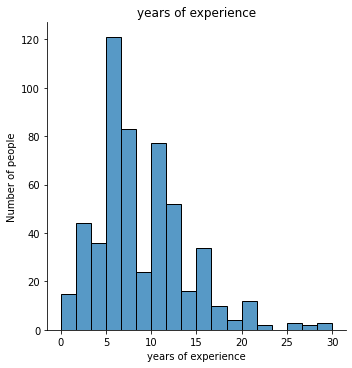

In [36]:
# years of experience (bar chart)

sns.displot(df["years of experience"])
plt.title("years of experience")
plt.ylabel("Number of people")

Text(0, 0.5, 'Salary')

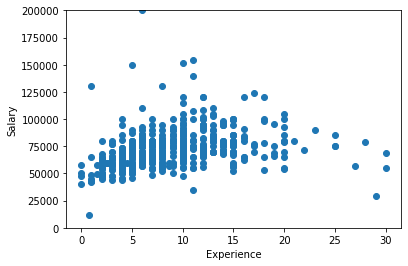

In [37]:
# years of experience (scatter plot)

plt.scatter(df['years of experience'], df['Salary'])
plt.ylim(0,200000)
plt.xlabel("Experience")
plt.ylabel("Salary")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

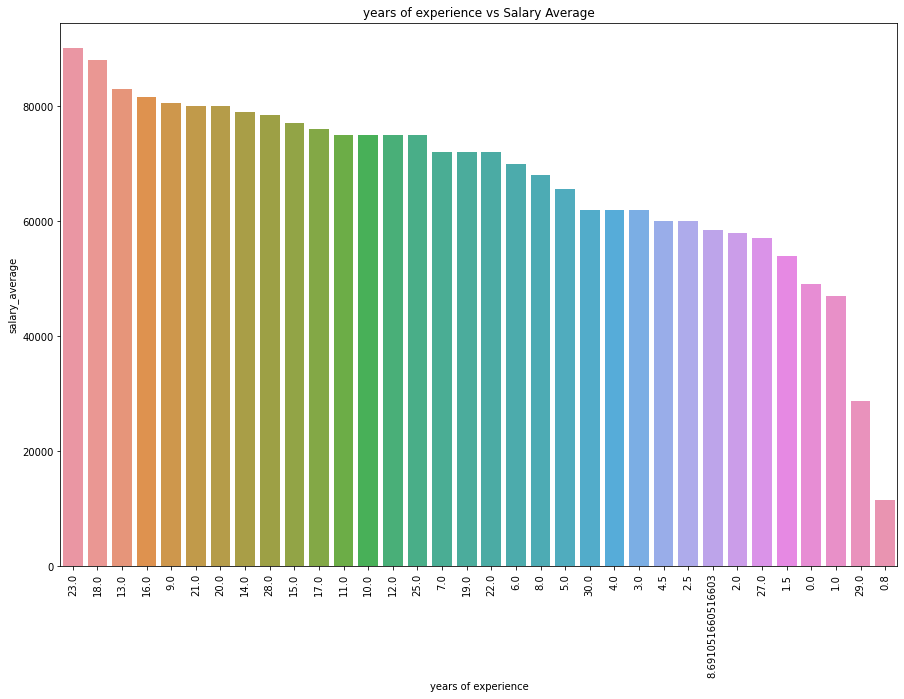

In [38]:
# years of experience (bar chart)

plt.figure(figsize=(15,10))
op = df.groupby("years of experience").agg(salary_average = ('Salary', 'median'))
op = op.reset_index()
op['years of experience'] = op['years of experience'].astype('str')
op = op.sort_values('salary_average', ascending=False)
sns.barplot(x=op["years of experience"], y=op["salary_average"])
plt.title("years of experience vs Salary Average")
plt.xticks(rotation=90)

**Creating Linear Regression Model**

In [39]:
#importing linearRegression based model

from sklearn.linear_model import LinearRegression

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pickle

In [42]:
df.columns

Index(['Age', 'Gender', 'City', 'Position', 'years of experience', 'main_tech',
       'Seniority level', 'Salary'],
      dtype='object')

In [43]:
X = df[['Age', 'Gender', 'City', 'Position', 'years of experience', 'main_tech', 'Seniority level']]

In [44]:
# create encoder 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(df[[
    "Gender", "City", "Position", "main_tech", "Seniority level"
]])

OneHotEncoder()

In [45]:
# categorical values turns into numerical
X = pd.get_dummies(data=X, drop_first=False)
X.head()

,Age,years of experience,Gender_Diverse,Gender_Female,Gender_Male,City_Amsterdam,City_Berlin,City_Cologne,City_Frankfurt,City_Hamburg,City_Munich,City_Stuttgart,Position_Backend Developer,Position_Data Engineer,Position_Data Scientist,Position_Designer (UI/UX),Position_DevOps,Position_Engineering Manager,Position_Frontend Developer,Position_ML Engineer,Position_Mobile Developer,Position_Product Manager,Position_QA Engineer,Position_Software Engineer,main_tech_C#,main_tech_C++,main_tech_Go,main_tech_Java,main_tech_JavaScript,main_tech_Kotlin,main_tech_PHP,main_tech_Python,main_tech_Python,main_tech_Ruby,main_tech_Scala,main_tech_Swift,main_tech_TypeScript,main_tech_iOS,Seniority level_Head,Seniority level_Junior,Seniority level_Lead,Seniority level_Middle,Seniority level_Senior
0,26.0,5.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,26.0,7.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,28.0,4.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,37.0,6.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,29.0,8.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
X.shape

(538, 43)

In [47]:
df['Gender'].value_counts()

Male       471
Female      66
Diverse      1
Name: Gender, dtype: int64

In [48]:
Y = df['Salary']
Y



0       80000.0
1       80000.0
3       54000.0
6       57000.0
8       56000.0
         ...   
1236    76000.0
1243    55000.0
1244    95000.0
1245    55000.0
1248    70000.0
Name: Salary, Length: 538, dtype: float64

In [49]:
Y=Y.values.reshape(-1,1)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(403, 43)
(135, 43)
(403, 1)
(135, 1)


In [53]:
X_train

,Age,years of experience,Gender_Diverse,Gender_Female,Gender_Male,City_Amsterdam,City_Berlin,City_Cologne,City_Frankfurt,City_Hamburg,City_Munich,City_Stuttgart,Position_Backend Developer,Position_Data Engineer,Position_Data Scientist,Position_Designer (UI/UX),Position_DevOps,Position_Engineering Manager,Position_Frontend Developer,Position_ML Engineer,Position_Mobile Developer,Position_Product Manager,Position_QA Engineer,Position_Software Engineer,main_tech_C#,main_tech_C++,main_tech_Go,main_tech_Java,main_tech_JavaScript,main_tech_Kotlin,main_tech_PHP,main_tech_Python,main_tech_Python,main_tech_Ruby,main_tech_Scala,main_tech_Swift,main_tech_TypeScript,main_tech_iOS,Seniority level_Head,Seniority level_Junior,Seniority level_Lead,Seniority level_Middle,Seniority level_Senior
1026,25.0,6.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
859,27.0,4.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
316,30.0,9.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
627,31.0,4.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1004,32.0,5.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,33.0,10.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1131,35.0,15.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
754,24.0,2.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1055,35.0,12.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
df

,Age,Gender,City,Position,years of experience,main_tech,Seniority level,Salary
0,26.0,Male,Munich,Software Engineer,5.0,TypeScript,Senior,80000.0
1,26.0,Male,Berlin,Backend Developer,7.0,Ruby,Senior,80000.0
3,28.0,Male,Berlin,Frontend Developer,4.0,JavaScript,Junior,54000.0
6,37.0,Male,Berlin,Frontend Developer,6.0,JavaScript,Middle,57000.0
8,29.0,Male,Berlin,Backend Developer,8.0,PHP,Senior,56000.0
...,...,...,...,...,...,...,...,...
1236,39.0,Male,Berlin,QA Engineer,7.0,Java,Senior,76000.0
1243,32.0,Female,Munich,QA Engineer,8.0,Java,Senior,55000.0
1244,32.0,Male,Munich,Software Engineer,10.0,Scala,Head,95000.0
1245,28.0,Male,Berlin,Frontend Developer,5.0,JavaScript,Middle,55000.0


In [55]:
#model = LinearRegression()

In [58]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(Y)


In [59]:
# scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [60]:
# train the model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
model.score(X_test_scaled, y_test_scaled)

-4.388457500519602e+25

In [61]:
X_train_scaled

array([[-1.3423526 , -0.53692621, -0.04315319, ..., -0.39621869,
         1.59357262, -1.02255923],
       [-0.96631214, -0.93271965, -0.04315319, ..., -0.39621869,
        -0.62752082, -1.02255923],
       [-0.40225146,  0.05676395, -0.04315319, ..., -0.39621869,
         1.59357262, -1.02255923],
       ...,
       [-1.53037283, -1.3285131 , -0.04315319, ..., -0.39621869,
        -0.62752082, -1.02255923],
       [ 0.53784969,  0.65045411, -0.04315319, ..., -0.39621869,
         1.59357262, -1.02255923],
       [-0.77829191, -0.53692621, -0.04315319, ..., -0.39621869,
        -0.62752082,  0.97793846]])

In [62]:
df.columns

Index(['Age', 'Gender', 'City', 'Position', 'years of experience', 'main_tech',
       'Seniority level', 'Salary'],
      dtype='object')

In [63]:
X_train

,Age,years of experience,Gender_Diverse,Gender_Female,Gender_Male,City_Amsterdam,City_Berlin,City_Cologne,City_Frankfurt,City_Hamburg,City_Munich,City_Stuttgart,Position_Backend Developer,Position_Data Engineer,Position_Data Scientist,Position_Designer (UI/UX),Position_DevOps,Position_Engineering Manager,Position_Frontend Developer,Position_ML Engineer,Position_Mobile Developer,Position_Product Manager,Position_QA Engineer,Position_Software Engineer,main_tech_C#,main_tech_C++,main_tech_Go,main_tech_Java,main_tech_JavaScript,main_tech_Kotlin,main_tech_PHP,main_tech_Python,main_tech_Python,main_tech_Ruby,main_tech_Scala,main_tech_Swift,main_tech_TypeScript,main_tech_iOS,Seniority level_Head,Seniority level_Junior,Seniority level_Lead,Seniority level_Middle,Seniority level_Senior
1026,25.0,6.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
859,27.0,4.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
316,30.0,9.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
627,31.0,4.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1004,32.0,5.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,33.0,10.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1131,35.0,15.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
754,24.0,2.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1055,35.0,12.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [64]:
X

,Age,years of experience,Gender_Diverse,Gender_Female,Gender_Male,City_Amsterdam,City_Berlin,City_Cologne,City_Frankfurt,City_Hamburg,City_Munich,City_Stuttgart,Position_Backend Developer,Position_Data Engineer,Position_Data Scientist,Position_Designer (UI/UX),Position_DevOps,Position_Engineering Manager,Position_Frontend Developer,Position_ML Engineer,Position_Mobile Developer,Position_Product Manager,Position_QA Engineer,Position_Software Engineer,main_tech_C#,main_tech_C++,main_tech_Go,main_tech_Java,main_tech_JavaScript,main_tech_Kotlin,main_tech_PHP,main_tech_Python,main_tech_Python,main_tech_Ruby,main_tech_Scala,main_tech_Swift,main_tech_TypeScript,main_tech_iOS,Seniority level_Head,Seniority level_Junior,Seniority level_Lead,Seniority level_Middle,Seniority level_Senior
0,26.0,5.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,26.0,7.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,28.0,4.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,37.0,6.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,29.0,8.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,39.0,7.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1243,32.0,8.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1244,32.0,10.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1245,28.0,5.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [65]:
df[['Age', 'Gender', 'City', 'Position', 'years of experience', 'main_tech', 'Seniority level']]

,Age,Gender,City,Position,years of experience,main_tech,Seniority level
0,26.0,Male,Munich,Software Engineer,5.0,TypeScript,Senior
1,26.0,Male,Berlin,Backend Developer,7.0,Ruby,Senior
3,28.0,Male,Berlin,Frontend Developer,4.0,JavaScript,Junior
6,37.0,Male,Berlin,Frontend Developer,6.0,JavaScript,Middle
8,29.0,Male,Berlin,Backend Developer,8.0,PHP,Senior
...,...,...,...,...,...,...,...
1236,39.0,Male,Berlin,QA Engineer,7.0,Java,Senior
1243,32.0,Female,Munich,QA Engineer,8.0,Java,Senior
1244,32.0,Male,Munich,Software Engineer,10.0,Scala,Head
1245,28.0,Male,Berlin,Frontend Developer,5.0,JavaScript,Middle


In [66]:
# create encoder 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(df[[
    "Gender", "City", "Position", "main_tech", "Seniority level"
]])

OneHotEncoder()

In [68]:
print(*encoder.categories_)

['Diverse' 'Female' 'Male'] ['Amsterdam' 'Berlin' 'Cologne' 'Frankfurt' 'Hamburg' 'Munich' 'Stuttgart'] ['Backend Developer' 'Data Engineer' 'Data Scientist' 'Designer (UI/UX)'
 'DevOps' 'Engineering Manager' 'Frontend Developer' 'ML Engineer'
 'Mobile Developer' 'Product Manager' 'QA Engineer' 'Software Engineer'] ['C#' 'C++' 'Go' 'Java' 'JavaScript' 'Kotlin' 'PHP' 'Python' 'Python '
 'Ruby' 'Scala' 'Swift' 'TypeScript' 'iOS'] ['Head' 'Junior' 'Lead' 'Middle' 'Senior']


In [69]:
# save model 
import joblib
joblib.dump(model, "model.sav")
joblib.dump(y_scaler, "y_scaler.sav")
joblib.dump(X_scaler, "x_scaler.sav")
joblib.dump(encoder, "encoder.sav")

['encoder.sav']

In [70]:
df.head()

,Age,Gender,City,Position,years of experience,main_tech,Seniority level,Salary
0,26.0,Male,Munich,Software Engineer,5.0,TypeScript,Senior,80000.0
1,26.0,Male,Berlin,Backend Developer,7.0,Ruby,Senior,80000.0
3,28.0,Male,Berlin,Frontend Developer,4.0,JavaScript,Junior,54000.0
6,37.0,Male,Berlin,Frontend Developer,6.0,JavaScript,Middle,57000.0
8,29.0,Male,Berlin,Backend Developer,8.0,PHP,Senior,56000.0


In [71]:
def predict(user_inputs):
    # load model binaries 
    model = joblib.load("model.sav")
    encoder = joblib.load("encoder.sav")
    X_scaler = joblib.load("x_scaler.sav")
    y_scaler  = joblib.load("y_scaler.sav")

    # get the user input data 

    age = user_inputs["Age"]
    gender = user_inputs["Gender"]
    city = user_inputs["City"]
    position = user_inputs["Position"]
    years = user_inputs["years of experience"]
    main_tech = user_inputs["main_tech"]
    level = user_inputs["Seniority level"]


    # cat_input_df = user_inputs[["Gender", "City", "Position", "main_tech", "Seniority level"]]
    cat_input_df = pd.DataFrame({
        "Gender": [gender],
        "City": [city],
        "Position": [position],
        "main_tech": [main_tech],
        "Seniority level": [level]
    })

    # use encoder to transform the city df 
    X_transformed = encoder.transform(cat_input_df)
    print(*encoder.categories_)
    cols = np.concatenate(encoder.categories_).ravel()
    
    cat_input_df = pd.DataFrame(columns=[cols], data=X_transformed.toarray())
    
    # store pressure and humidty into df 
    input_df = pd.DataFrame({
        "Age": [age],
        "years of experience": [years]
    })

    # combine both df's using indexes 
    df = input_df.merge(cat_input_df, left_index=True, right_index=True)

    # scale the X input df 
    X_scaled = X_scaler.transform(df)

    # obtain prediction (y) 
    prediction_scaled = model.predict(X_scaled)
    
    # scale prediction to human readable terms i.e. celcius 
    prediction = y_scaler.inverse_transform(prediction_scaled)
    return prediction[0][0]

In [72]:
X_train

,Age,years of experience,Gender_Diverse,Gender_Female,Gender_Male,City_Amsterdam,City_Berlin,City_Cologne,City_Frankfurt,City_Hamburg,City_Munich,City_Stuttgart,Position_Backend Developer,Position_Data Engineer,Position_Data Scientist,Position_Designer (UI/UX),Position_DevOps,Position_Engineering Manager,Position_Frontend Developer,Position_ML Engineer,Position_Mobile Developer,Position_Product Manager,Position_QA Engineer,Position_Software Engineer,main_tech_C#,main_tech_C++,main_tech_Go,main_tech_Java,main_tech_JavaScript,main_tech_Kotlin,main_tech_PHP,main_tech_Python,main_tech_Python,main_tech_Ruby,main_tech_Scala,main_tech_Swift,main_tech_TypeScript,main_tech_iOS,Seniority level_Head,Seniority level_Junior,Seniority level_Lead,Seniority level_Middle,Seniority level_Senior
1026,25.0,6.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
859,27.0,4.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
316,30.0,9.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
627,31.0,4.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1004,32.0,5.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,33.0,10.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1131,35.0,15.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
754,24.0,2.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1055,35.0,12.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [73]:
df.head(2)

,Age,Gender,City,Position,years of experience,main_tech,Seniority level,Salary
0,26.0,Male,Munich,Software Engineer,5.0,TypeScript,Senior,80000.0
1,26.0,Male,Berlin,Backend Developer,7.0,Ruby,Senior,80000.0


In [74]:
# test a single prediction 
user_inputs = {
    "Age": 26, 
    "Gender": "Male",
    "City": "Berlin" ,
    "Position": "Software Engineer",
    "years of experience": 7,
    "main_tech" : "Python",
    "Seniority level": "Senior"

}

In [75]:
# load model binaries 
model = joblib.load("model.sav")
encoder = joblib.load("encoder.sav")
X_scaler = joblib.load("x_scaler.sav")
y_scaler  = joblib.load("y_scaler.sav")

# get the user input data 
age = user_inputs["Age"]
gender = user_inputs["Gender"]
city = user_inputs["City"]
position = user_inputs["Position"]
years = user_inputs["years of experience"]
main_tech = user_inputs["main_tech"]
level = user_inputs["Seniority level"]

In [76]:
cat_input_df = pd.DataFrame({
    "Gender": [gender],
    "City": [city],
    "Position": [position],
    "main_tech": [main_tech],
    "Seniority level": [level]
})

In [77]:
# use encoder to transform the city df 
X_transformed = encoder.transform(cat_input_df)
print(*encoder.categories_)

['Diverse' 'Female' 'Male'] ['Amsterdam' 'Berlin' 'Cologne' 'Frankfurt' 'Hamburg' 'Munich' 'Stuttgart'] ['Backend Developer' 'Data Engineer' 'Data Scientist' 'Designer (UI/UX)'
 'DevOps' 'Engineering Manager' 'Frontend Developer' 'ML Engineer'
 'Mobile Developer' 'Product Manager' 'QA Engineer' 'Software Engineer'] ['C#' 'C++' 'Go' 'Java' 'JavaScript' 'Kotlin' 'PHP' 'Python' 'Python '
 'Ruby' 'Scala' 'Swift' 'TypeScript' 'iOS'] ['Head' 'Junior' 'Lead' 'Middle' 'Senior']


In [78]:
out = np.concatenate(encoder.categories_).ravel()
    
cat_input_df = pd.DataFrame(columns=[out], data=X_transformed.toarray())

In [79]:
X_transformed.shape

(1, 41)

In [80]:
# store age and years of experience into df 
input_df = pd.DataFrame({
    "Age": [age],
    "years of experience": [years]
})

# combine both df's using indexes 
df = input_df.merge(cat_input_df, left_index=True, right_index=True)

In [81]:
df

,Age,years of experience,"(Diverse,)","(Female,)","(Male,)","(Amsterdam,)","(Berlin,)","(Cologne,)","(Frankfurt,)","(Hamburg,)","(Munich,)","(Stuttgart,)","(Backend Developer,)","(Data Engineer,)","(Data Scientist,)","(Designer (UI/UX),)","(DevOps,)","(Engineering Manager,)","(Frontend Developer,)","(ML Engineer,)","(Mobile Developer,)","(Product Manager,)","(QA Engineer,)","(Software Engineer,)","(C#,)","(C++,)","(Go,)","(Java,)","(JavaScript,)","(Kotlin,)","(PHP,)","(Python,)","(Python ,)","(Ruby,)","(Scala,)","(Swift,)","(TypeScript,)","(iOS,)","(Head,)","(Junior,)","(Lead,)","(Middle,)","(Senior,)"
0,26,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
X_train_scaled[0]

array([-1.3423526 , -0.53692621, -0.04315319, -0.37393918,  0.37716115,
       -0.11481583,  0.70907919, -0.11481583, -0.17507524, -0.22075539,
       -0.51563781, -0.15104201, -0.51852476, -0.17507524, -0.34761089,
       -0.04315319, -0.13043478, -0.12285902, -0.26378496, -0.20648404,
       -0.23869323, -0.04315319, -0.25562968,  1.24005478, -0.17507524,
       -0.20154145, -0.19649437, -0.6246446 , -0.33402133, -0.19649437,
       -0.2834101 , -0.53004941, -0.18063654, -0.18063654,  4.62781446,
       -0.19133443, -0.15104201, -0.13043478, -0.13762047, -0.23431167,
       -0.39621869,  1.59357262, -1.02255923])

In [83]:
df

,Age,years of experience,"(Diverse,)","(Female,)","(Male,)","(Amsterdam,)","(Berlin,)","(Cologne,)","(Frankfurt,)","(Hamburg,)","(Munich,)","(Stuttgart,)","(Backend Developer,)","(Data Engineer,)","(Data Scientist,)","(Designer (UI/UX),)","(DevOps,)","(Engineering Manager,)","(Frontend Developer,)","(ML Engineer,)","(Mobile Developer,)","(Product Manager,)","(QA Engineer,)","(Software Engineer,)","(C#,)","(C++,)","(Go,)","(Java,)","(JavaScript,)","(Kotlin,)","(PHP,)","(Python,)","(Python ,)","(Ruby,)","(Scala,)","(Swift,)","(TypeScript,)","(iOS,)","(Head,)","(Junior,)","(Lead,)","(Middle,)","(Senior,)"
0,26,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [84]:
predict(user_inputs)

['Diverse' 'Female' 'Male'] ['Amsterdam' 'Berlin' 'Cologne' 'Frankfurt' 'Hamburg' 'Munich' 'Stuttgart'] ['Backend Developer' 'Data Engineer' 'Data Scientist' 'Designer (UI/UX)'
 'DevOps' 'Engineering Manager' 'Frontend Developer' 'ML Engineer'
 'Mobile Developer' 'Product Manager' 'QA Engineer' 'Software Engineer'] ['C#' 'C++' 'Go' 'Java' 'JavaScript' 'Kotlin' 'PHP' 'Python' 'Python '
 'Ruby' 'Scala' 'Swift' 'TypeScript' 'iOS'] ['Head' 'Junior' 'Lead' 'Middle' 'Senior']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


68301.84951322318